In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('final_dataset.csv')

X = df["text"]
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from data.data_preprocessor import DataPreprocessor
import matplotlib.pyplot as plt
import umap.umap_ as umap


In [13]:
def vectorize(vectorizer, X_train, X_test):
    preprocessor = DataPreprocessor()
    X_train = preprocessor.fit_transform(X_train)
    X_test = preprocessor.fit_transform(X_test)
    vectorizer.fit(X_train)

    bow = vectorizer.transform(X_train)
    bow_test = vectorizer.transform(X_test)

    print(bow.shape)

    scaler = MaxAbsScaler()
    reducer = umap.UMAP(n_neighbors=15, n_components=2)
    embedding = reducer.fit_transform(bow)
    
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap="bwr")
    plt.title('UMAP Projection of Random Data')
    plt.xlabel('UMAP Feature 1')
    plt.ylabel('UMAP Feature 2')
    plt.legend()
    plt.show()
    return {"train": scaler.fit_transform(bow),
            "test": scaler.transform(bow_test)}


def fit_predict(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

[nltk_data] Downloading package stopwords to /Library/Frameworks/Pytho
[nltk_data]     n.framework/Versions/3.10/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(7165, 278)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


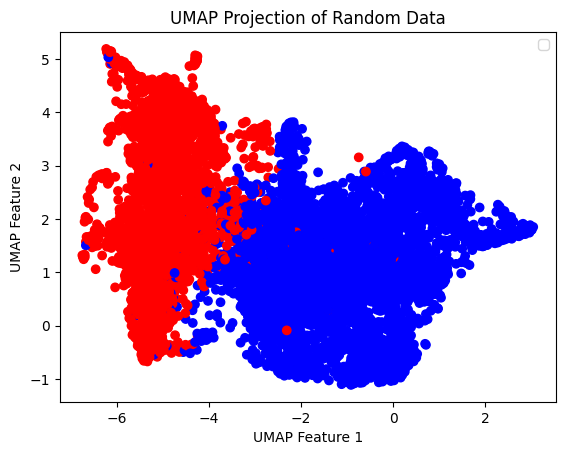

[nltk_data] Downloading package stopwords to /Library/Frameworks/Pytho
[nltk_data]     n.framework/Versions/3.10/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(7165, 278)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


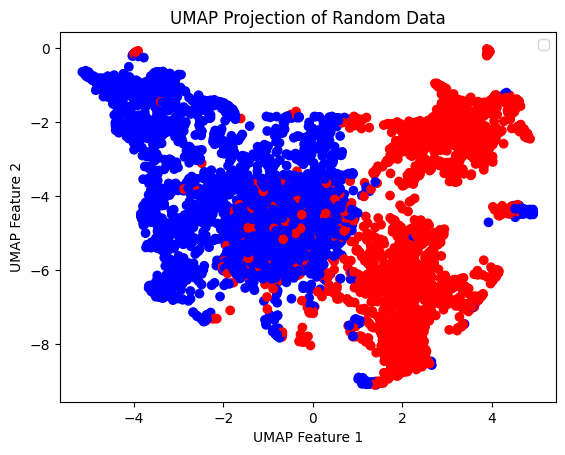

In [14]:
vectorizers = {
    "CountVectorizer": CountVectorizer(ngram_range=(1, 3), min_df=0.05, max_df=0.8),
    "TfidfVectorizer": TfidfVectorizer(ngram_range=(1, 3), min_df=0.05, max_df=0.8),
}

vectorized_data = {vectorizer_name: vectorize(vectorizers[vectorizer_name], X_train, X_test) for vectorizer_name in
                   vectorizers}


In [15]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "CatBoostClassifier": CatBoostClassifier(iterations=1000, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVC": SVC(kernel="linear", class_weight='balanced', random_state=42),
}

for model_name in models:
    for vectorizer_name in vectorizers:
        print(f"Model : {model_name} \nVectorizer : {vectorizer_name}\n")

        fit_predict(models[model_name], vectorized_data[vectorizer_name]['train'], y_train,
                    vectorized_data[vectorizer_name]['test'], y_test)

Model : LogisticRegression 
Vectorizer : CountVectorizer

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1491
           1       1.00      1.00      1.00       898

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389

Model : LogisticRegression 
Vectorizer : TfidfVectorizer

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1491
           1       1.00      1.00      1.00       898

    accuracy                           1.00      2389
   macro avg       1.00      1.00      1.00      2389
weighted avg       1.00      1.00      1.00      2389

Model : CatBoostClassifier 
Vectorizer : CountVectorizer

Learning rate set to 0.023884
0:	learn: 0.6575376	total: 3.41ms	remaining: 3.4s
1:	learn: 0.6059405	total: 6.76ms	remaining: 3.37s
2:	learn: 0.5769399	total: 9.95ms	remaini